<a href="https://colab.research.google.com/github/sudama-Inc/GRIP-TheSparkFoundation-Internship/blob/main/GRIP_ColorIdentificationinImages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The type of this input is <class 'numpy.ndarray'>
Shape: (3456, 4608, 3)


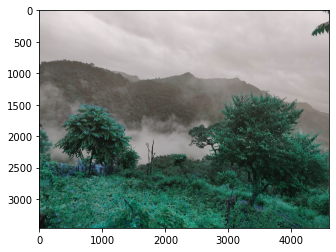

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Datasets/sample_image.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

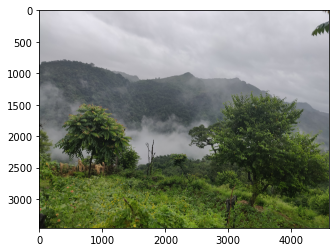

In [ ]:

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

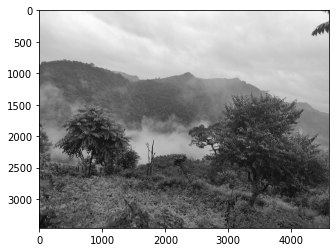

In [ ]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

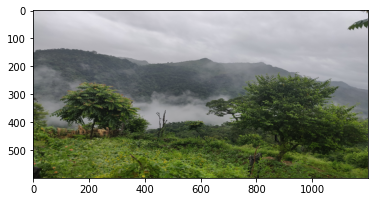

In [ ]:

resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

In [ ]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [ ]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [ ]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

[array([83.85545295, 90.72101645, 91.98180102]),
 array([206.32113579, 206.02651641, 213.48235554]),
 array([110.02341862, 125.52921133,  56.72882721]),
 array([54.93304136, 67.8426854 , 34.19499721]),
 array([120.63778755, 125.23182963, 125.05112885]),
 array([179.11536865, 179.71478766, 186.12723752]),
 array([78.85929162, 96.61873724, 38.58532393]),
 array([30.41262951, 38.87326718, 21.26856851])]

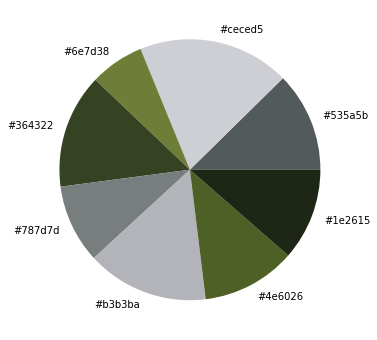

In [ ]:
get_colors(get_image('/content/drive/MyDrive/Datasets/sample_image.jpg'), 8, True)
